# TensorFlow的分类器模型构建(监督学习)归一化后--回调函数
使用数据集-> Fashion Mnist

In [1]:
import os
from tensorflow import keras
import tensorflow as tf
import sklearn
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

# 这串代码让图像直接显示在Notebook里而不是单独打开一个窗口
%matplotlib inline

In [2]:
fashion_mnist = keras.datasets.fashion_mnist
(x_train_all, y_train_all), (x_test, y_test) = fashion_mnist.load_data()

# 训练集 验证集
x_valid, x_train = x_train_all[:5000], x_train_all[5000:]
y_valid, y_train = y_train_all[:5000], y_train_all[5000:]

# 归一化前的max和min
print(np.max(x_train), np.min(x_train))

255 0


In [3]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(
    x_train.astype(np.float32).reshape(-1, 1)).reshape(-1, 28, 28)
x_valid_scaled = scaler.transform(
    x_valid.astype(np.float32).reshape(-1, 1)).reshape(-1, 28, 28)
x_test_scaled = scaler.transform(
    x_test.astype(np.float32).reshape(-1, 1)).reshape(-1, 28, 28)

# 归一化后的max和min
print(np.max(x_train_scaled), np.min(x_train_scaled))

2.0231433 -0.8105136


In [4]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape = [28,28]))
for _ in range(20):
    model.add(keras.layers.Dense(200 , activation = 'selu'))
model.add(keras.layers.Dense(10,activation = 'softmax'))

W0630 23:43:28.255173 140275690293056 deprecation.py:323] From /home/ubuntu/.local/lib/python3.6/site-packages/tensorflow/python/keras/backend.py:4149: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [6]:
model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='sgd',
    metrics=["accuracy"]
)

In [10]:
# 记录callbacks的文件夹与文件
logdir = './callbacks'
if not os.path.exists(logdir):
    os.mkdir(logdir)
output_model_file = os.path.join(logdir, 'fashion_mnist_model.h5')

#
history = model.fit(x_train_scaled, y_train,
                    epochs=20,
                    validation_data=(x_valid_scaled, y_valid),
                    callbacks=[
                        keras.callbacks.EarlyStopping(patience = 5 , min_delta = 1e-3),
                        keras.callbacks.ModelCheckpoint(
                            output_model_file, save_best_only=True),
                        keras.callbacks.TensorBoard(logdir)
                    ]
                    )

Train on 55000 samples, validate on 5000 samples
Epoch 1/20
55000/55000 [==============================] - 23s 418us/sample - loss: 0.2076 - accuracy: 0.9210 - val_loss: 0.3361 - val_accuracy: 0.8816
Epoch 2/20
55000/55000 [==============================] - 22s 392us/sample - loss: 0.1991 - accuracy: 0.9234 - val_loss: 0.3136 - val_accuracy: 0.8950
Epoch 3/20
55000/55000 [==============================] - 21s 374us/sample - loss: 0.1864 - accuracy: 0.9294 - val_loss: 0.3867 - val_accuracy: 0.8784
Epoch 4/20
55000/55000 [==============================] - 22s 403us/sample - loss: 0.1801 - accuracy: 0.9320 - val_loss: 0.3355 - val_accuracy: 0.8878
Epoch 5/20
55000/55000 [==============================] - 21s 375us/sample - loss: 0.1727 - accuracy: 0.9349 - val_loss: 0.3338 - val_accuracy: 0.8912
Epoch 6/20
55000/55000 [==============================] - 21s 374us/sample - loss: 0.1663 - accuracy: 0.9346 - val_loss: 0.3445 - val_accuracy: 0.8892
Epoch 7/20
55000/55000 [=====================

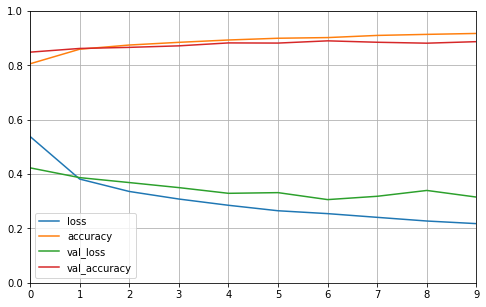

In [8]:
def plot_learning_curves(history):
    pd.DataFrame(history.history).plot(figsize=(8, 5))
    plt.grid(True)
    plt.gca().set_ylim(0, 1)
    plt.show()


plot_learning_curves(history)

In [9]:
# 使用测试集验证模型的准确度
model.evaluate(x_test_scaled, y_test)

10000/10000 [==============================] - ETA: 0s - loss: 0.3530 - accuracy: 0.87 - 2s 157us/sample - loss: 0.3532 - accuracy: 0.8740


[0.3531768734037876, 0.874]